In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Exploratory Data Analysis

In [6]:
data["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

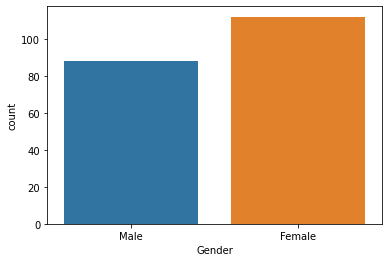

In [7]:
sns.countplot(data['Gender'])
plt.show()

In [8]:
# Mean Annual Income by Gender

income = data[['Gender','Annual Income (k$)']].groupby('Gender').mean().reset_index()
income

,Gender,Annual Income (k$)
0,Female,59.250000
1,Male,62.227273


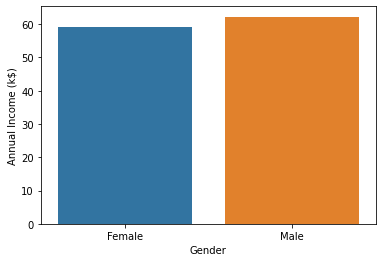

In [9]:
# Annual income of male is slightly higher than female

sns.barplot(x='Gender',y = 'Annual Income (k$)',data = income)
plt.show()

In [10]:
spending_score = data[['Gender','Spending Score (1-100)']].groupby('Gender').mean().reset_index()
spending_score

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


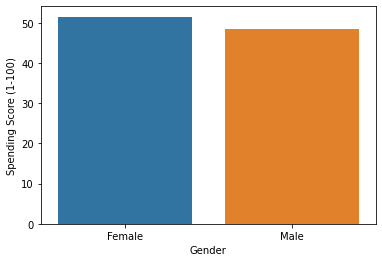

In [11]:
# Spending score of female is slightly higher than male

sns.barplot(x='Gender',y = 'Spending Score (1-100)',data = spending_score)
plt.show()

In [12]:
gender_age = data[['Gender','Age']].groupby('Gender').mean().reset_index()
gender_age

,Gender,Age
0,Female,38.098214
1,Male,39.806818


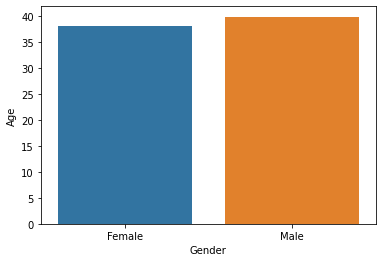

In [13]:
sns.barplot(x='Gender',y = 'Age',data = gender_age)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

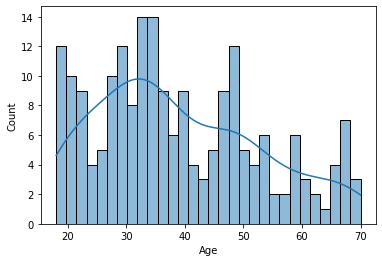

In [14]:
sns.histplot(x='Age',data=data,bins=30,kde=True )

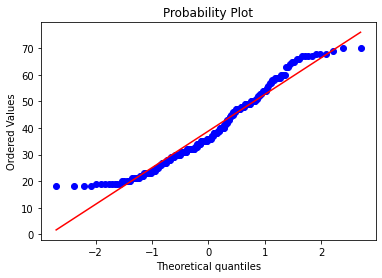

In [15]:
# From above grpah and current one, we conclude that data has a slight degree of skewness 

stats.probplot(data['Age'],plot=plt)
plt.show()

<AxesSubplot:xlabel='Age'>

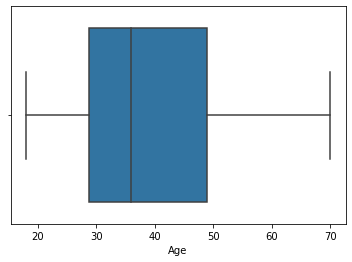

In [16]:
# There are no outliers 
sns.boxplot(data['Age'])

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

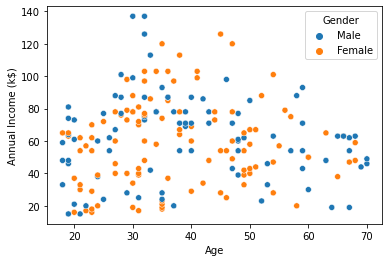

In [17]:
# Scatter plot between Age and Annual Income
# There are no signifiacnt relationship betwwen Age and Annual Income

sns.scatterplot(x='Age',y='Annual Income (k$)',data=data,hue='Gender')

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

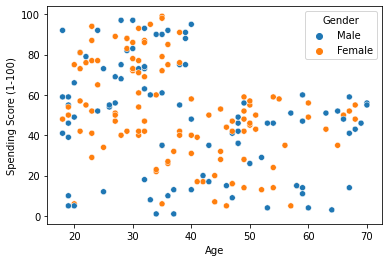

In [18]:
# There is no significant relationship between Age and Spending Score

sns.scatterplot(x= 'Age',y='Spending Score (1-100)',data=data,hue="Gender")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

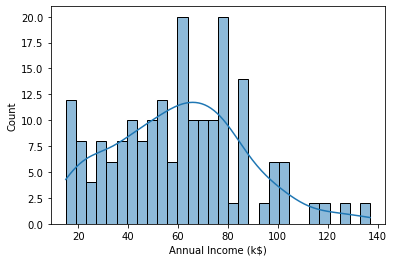

In [19]:
sns.histplot(data['Annual Income (k$)'],bins = 30,kde=True)

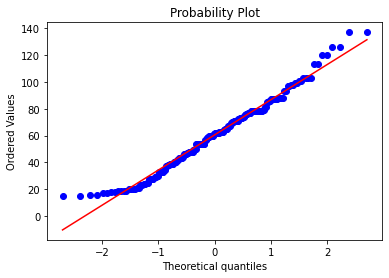

In [20]:
# From above grpah and current one, we conclude that data has a slight degree of skewness 

stats.probplot(data['Annual Income (k$)'],plot = plt)
plt.show()

<AxesSubplot:xlabel='Annual Income (k$)'>

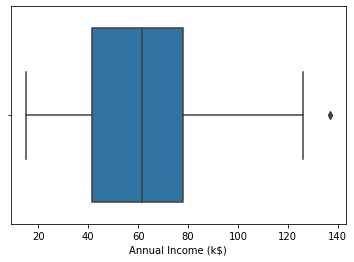

In [21]:
# Annual Income has a outlier

sns.boxplot(data["Annual Income (k$)"])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

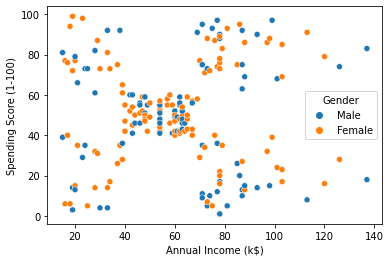

In [22]:
# Scatter plot between Annual Income and Spending Score
# We can see the formation of clusters in the data

sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data,hue="Gender")

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

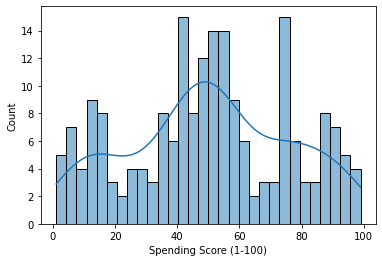

In [23]:
sns.histplot(data['Spending Score (1-100)'],bins=30,kde=True)

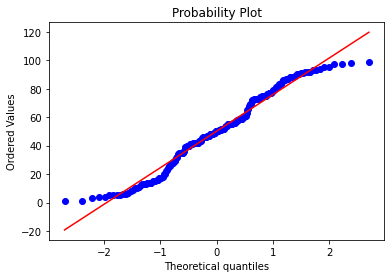

In [24]:
# From above grpah and current one we conclude that data is normally distributed but too packed in a middle  

stats.probplot(data["Spending Score (1-100)"],plot=plt)
plt.show()

<AxesSubplot:xlabel='Spending Score (1-100)'>

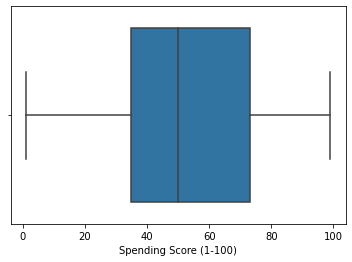

In [25]:
# There are no outliers

sns.boxplot(data['Spending Score (1-100)'])

# Clustering

In [26]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [32]:
# Cluster analysis of Age and Spending Score

X = data[['Age','Spending Score (1-100)']]

In [33]:
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


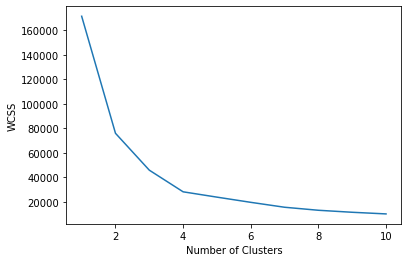

In [38]:
# Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,random_state=21)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
# From the grpah we can see that optimal number of clusters are 4

kmeans = KMeans(n_clusters=4,random_state=21)
y = kmeans.fit_predict(X)

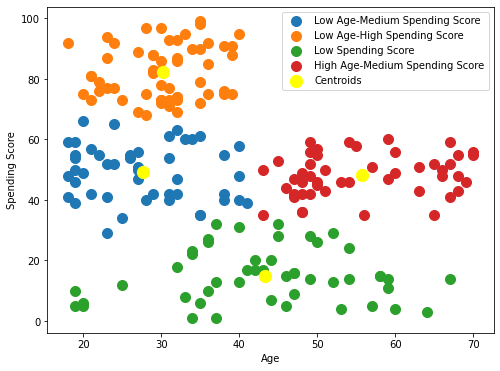

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[y==0,0],X.iloc[y==0,1],s=100,label = 'Low Age-Medium Spending Score')
plt.scatter(X.iloc[y==1,0],X.iloc[y==1,1],s=100,label = 'Low Age-High Spending Score')
plt.scatter(X.iloc[y==2,0],X.iloc[y==2,1],s=100,label = 'Low Spending Score')
plt.scatter(X.iloc[y==3,0],X.iloc[y==3,1],s=100,label = 'High Age-Medium Spending Score')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,c='yellow',label = 'Centroids')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

From the grpah we can see that data is divided into 4 clusters

    1. Low-Age and Medium Spending Score: Customers belong to this group has age <40 and spending score betwwen 35 to 70
    2. Low-Age and High Spending Score: Customers belong to this group has age <40 and spending score is greater than 70
    3. Low-Age and Medium Spending Score: Customers belong to this group has age >40 and spending score betwwen 35 to 70
    4. Low Spending Score: Customers belong to this group has spending score less than 35

The target of mall should be to decrease the customers in green cluster and focus on low age customers they are potential customers with both high and moderate spending score.

In [96]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X,y))

0.49973941540141753


In [98]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

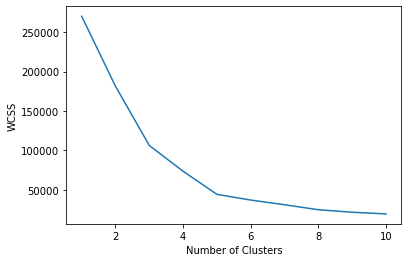

In [99]:
# Cluster ananlysis of Spending Score and Annual Income

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,random_state=21)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [100]:
# From the above graph we can conlcude that optimal number of clusters are 5

kmeans = KMeans(n_clusters=5,random_state=21)
y = kmeans.fit_predict(X)

In [101]:
y

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

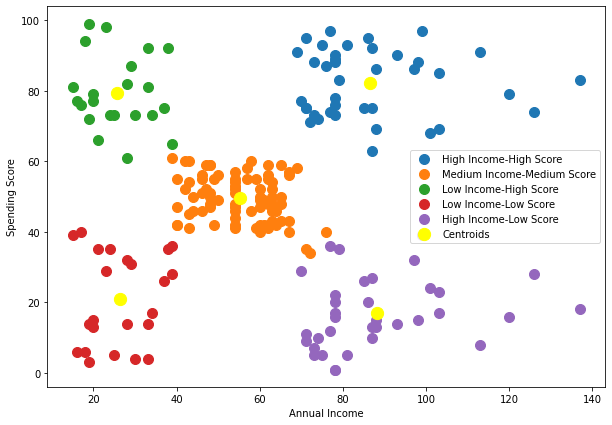

In [104]:
plt.figure(figsize=(10,7))
plt.scatter(X.iloc[y==0,0],X.iloc[y==0,1],s=100,label = 'High Income-High Score')
plt.scatter(X.iloc[y==1,0],X.iloc[y==1,1],s=100,label = 'Medium Income-Medium Score')
plt.scatter(X.iloc[y==2,0],X.iloc[y==2,1],s=100,label = 'Low Income-High Score')
plt.scatter(X.iloc[y==3,0],X.iloc[y==3,1],s=100,label = 'Low Income-Low Score')
plt.scatter(X.iloc[y==4,0],X.iloc[y==4,1],s=100,label = 'High Income-Low Score')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,c='yellow',label = 'Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

From the grpah we can see that data is divided into 5 clusters

    1. Low Income and High Score: Customers belong to this group has income< 40 and spending score is greater than 60
    2. Low Income and Low Score: Customers belong to this group has income< 40 and spending score is less than 40
    3. High Income and High Score: Customers belong to this group has income> 70 and spending score is greater than 60
    4. High Income and High Score: Customers belong to this group has income> 70 and spending score is less than 40
    5. Medium Income and Medium Score: Customers belong to this group has income between 40 to 70 and spending score is                between 40 and 60
    
The target of mall should be to convert high income and low score customers to high score customers and decrease low income and low score customers. Also, try to convert medium score customers toh high score customers.

In [105]:
print(silhouette_score(X,y))

0.553931997444648
